<a href="https://colab.research.google.com/github/himajakinthada28/TelecommunicationChurnAnalysisPrediction/blob/master/Churn_Pediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysing and predicting customer churn in telecommunications

In [ ]:
import pandas as pd 
import numpy as np
import xgboost
from sklearn import model_selection

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# load data

In [ ]:
data = pd.read_csv('churn_geekl.csv', header=None)
dataset = data.values
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
2,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
3,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
4,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.


In [ ]:
data.columns = data.iloc[0]
data=data.drop(data.index[0])

In [ ]:
col_names=data.columns.tolist()
col_names

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [ ]:
data.rename(columns={ 'Account Length':'Account_Length',
                     'Area Code':'Area_Code',
                     "Int'l Plan":'Intl_Plan',
                      'VMail Plan':'VMail_Plan',
                       'VMail Message':'VMail_Message',
                       'Day Mins':'Day_Mins',
                       'Day Calls':'Day_Calls',
                       'Day Charge':'Day_Charge',
                       'Eve Mins':'Eve_Mins',
                      'Eve Calls': 'Eve_Calls',
                      'Eve Charge':'Eve_Charge',
                      'Night Mins':'Night_Mins',
                      'Night Calls':'Night_Calls',
                     'Night Charge':'Night_Charge',
                     'Intl Mins':'Intl_Mins',
                      'Intl Calls':'Intl_Calls',
                     'Intl Charge':'Intl_Charge',
                     'CustServ Calls':'CustServ_Calls',
                     'Churn?':'Churn'},inplace=True)

Exploratory Data Analysis

In [ ]:
#find out the Categorical values and change them numerically

In [ ]:
print('\n', data.Intl_Plan.value_counts())
print('\n', data.VMail_Plan.value_counts())
print('\n', data.Churn.value_counts())


 no     3010
yes     323
Name: Intl_Plan, dtype: int64

 no     2411
yes     922
Name: VMail_Plan, dtype: int64

 False.    2850
True.      483
Name: Churn, dtype: int64


In [ ]:
data.Intl_Plan = data.Intl_Plan.apply( lambda x: 1.0 * (x=='yes') )
print('\n', data.Intl_Plan.value_counts())

data.VMail_Plan = data.VMail_Plan.apply( lambda x: 1.0 * (x=='yes') )
print('\n', data.VMail_Plan.value_counts())

data.Churn = data.Churn.apply( lambda x: 1.0 * (x=='True.') )
print('\n', data.Churn.value_counts())


 0.0    3010
1.0     323
Name: Intl_Plan, dtype: int64

 0.0    2411
1.0     922
Name: VMail_Plan, dtype: int64

 0.0    2850
1.0     483
Name: Churn, dtype: int64


In [ ]:
data.describe()

,Intl_Plan,VMail_Plan,Churn
count,3333.000000,3333.000000,3333.000000
mean,0.096910,0.276628,0.144914
std,0.295879,0.447398,0.352067
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


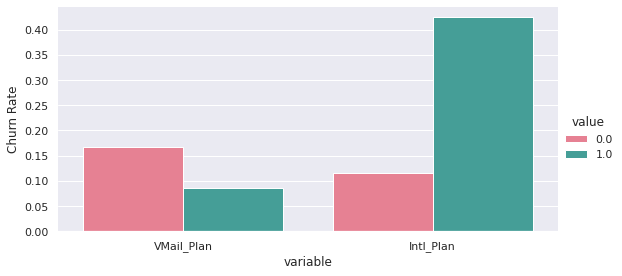

In [ ]:
# Create a new temporary dataframe to help us plot these variables.
df1 = pd.melt(data, id_vars=['Churn'], value_vars=["VMail_Plan","Intl_Plan"], var_name='variable' )

# Create a factorplot
g = sns.factorplot( x="variable", y="Churn", hue='value', data=df1, size=4, aspect=2, kind="bar", palette="husl", ci=None )
g.despine(left=True)
g.set_ylabels("Churn Rate")
plt.show()

In [ ]:
df2 = pd.pivot_table(data, values='Churn', index=['CustServ_Calls'], aggfunc=[len,np.sum,np.mean])
df2['ix'] = df2.index.values
df2.columns = df2.columns.droplevel()
print(df2)

                   len    sum      mean ix
CustServ_Calls                            
0                697.0   92.0  0.131994  0
1               1181.0  122.0  0.103302  1
2                759.0   87.0  0.114625  2
3                429.0   44.0  0.102564  3
4                166.0   76.0  0.457831  4
5                 66.0   40.0  0.606061  5
6                 22.0   14.0  0.636364  6
7                  9.0    5.0  0.555556  7
8                  2.0    1.0  0.500000  8
9                  2.0    2.0  1.000000  9


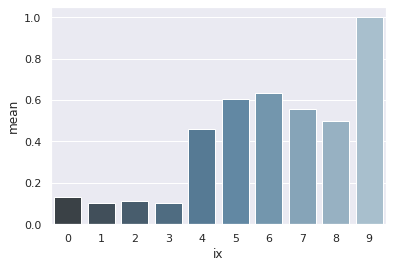

In [ ]:
sns.barplot(x="ix", y="mean", data=df2, palette="Blues_d", saturation=.5)
plt.show()

In [ ]:
# We don't need these columns
to_drop = ['State', 'Area_Code', 'Phone', 'Churn']
churn_feat_space = data.drop(to_drop, axis=1)
# Pull out features for future use
features = churn_feat_space.columns
X = churn_feat_space.values.astype(np.float)

churn_result = data['Churn']
data['Churn'].value_counts()


0.0    2850
1.0     483
Name: Churn, dtype: int64

In [ ]:
y = np.where(churn_result == 1,1,0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Feature space holds %d observations and %d features" % X.shape)
print("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [ ]:
def run_cv(X, y, clf_class, **kwargs):
    y_pred = y.copy()
    kf = KFold(n_splits=5, shuffle=True)
    
    # Iterate through folds
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred,clf

In [ ]:
rf,RF= run_cv(X, y, RandomForestClassifier)

In [ ]:
def accuracy(y_true, y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

In [ ]:
print("Random forest: {}%".format(100.0*accuracy(y, rf)))

Random forest: 95.5895589558956%


In [ ]:
print('Recall:   {}%'.format(100.0 * recall_score(y,rf)))

Recall:   73.91304347826086%


This is already a great result. It accurately predicts 95.7% of all customers! However, most of those are not churning and are therefore less interesting. If we look at the confusion-matrix that we created of the predictions versus the actual results we can see that we only correctly pick out 365 churning customers, but fail to identify the other 118 customers who do churn as well. This is correctly represented by the recall metric, which shows us we are only 75.56% good on the customers we actually want to be most accurate on.

Lets take a look and see how the model performs if we increase the number of estimators (the size) of the model.

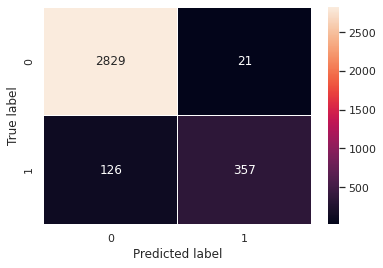

In [ ]:
sns.heatmap(confusion_matrix(y,rf,labels=[0,1]), annot=True, fmt="d", linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
pass

In [ ]:
RF.predict_proba(X[0:10])

array([[0.97, 0.03],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.69, 0.31],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       [0.89, 0.11],
       [0.88, 0.12],
       [0.88, 0.12]])

We Try to implement a Xgboost and would like to give to make a comapritive analysis over the churn analysis data.

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model=xgb.XGBClassifier()
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
xgbmodel=xgb.XGBClassifier()
xgbmodel

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgbmodel=xgbmodel.fit(X_train,y_train)

In [ ]:
print("Training set accuracy :",xgbmodel.score(X_train,y_train)*100)
print("testing set accuracy :",xgbmodel.score(X_test,y_test)*100)

Training set accuracy : 96.55172413793103
testing set accuracy : 94.27272727272728
